In [32]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [7]:
df = pd.read_csv("Ice_cream selling data.csv")

# Display first 5 rows
df.head()

# My current DataFrame is called df
# So now simplifying the column names
df = df.rename(columns={
    'Temperature (°C)': 'Temperature',
    'Ice Cream Sales (units)': 'Sales'
})

# Let's check it
df.head()



,Temperature,Sales
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [8]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  49 non-null     float64
 1   Sales        49 non-null     float64
dtypes: float64(2)
memory usage: 912.0 bytes


Temperature    0
Sales          0
dtype: int64

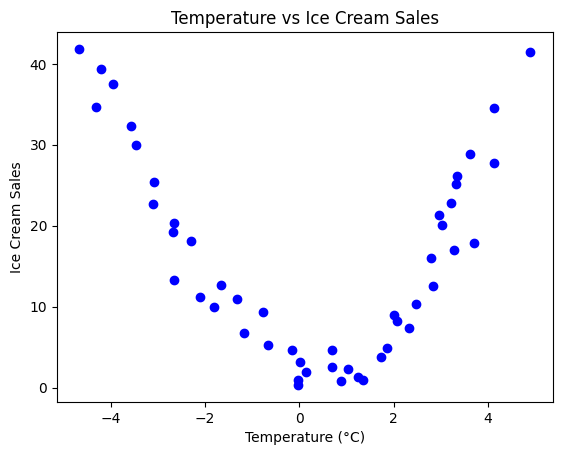

In [14]:
plt.scatter(df['Temperature'], df['Sales'], color='blue')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales')
plt.title('Temperature vs Ice Cream Sales')
plt.show()

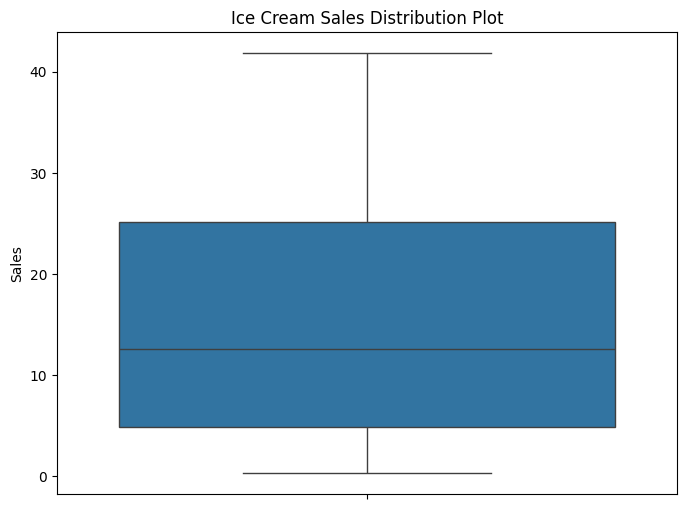

In [ ]:
# Visualize target variable distribution, Check for outliers
plt.figure(figsize=(8, 6))
plt.title('Ice Cream Sales Distribution Plot')
sns.boxplot(y=df['Sales'])
plt.ylabel('Sales')
plt.show()

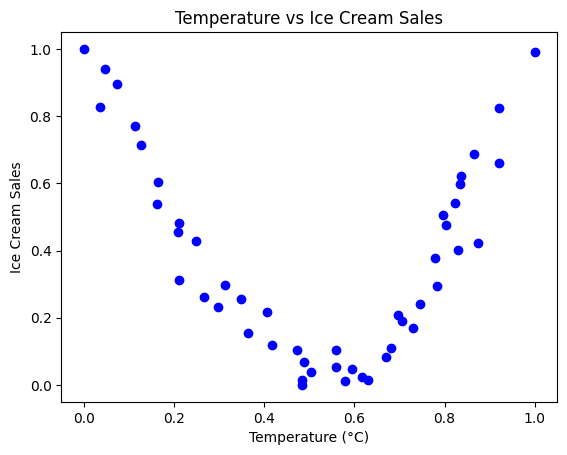

In [24]:
# Data Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df[['Temperature']])
y_scaled = scaler.fit_transform(df[['Sales']])

plt.scatter(X_scaled, y_scaled, color='blue')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales')
plt.title('Temperature vs Ice Cream Sales')
plt.show()


In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

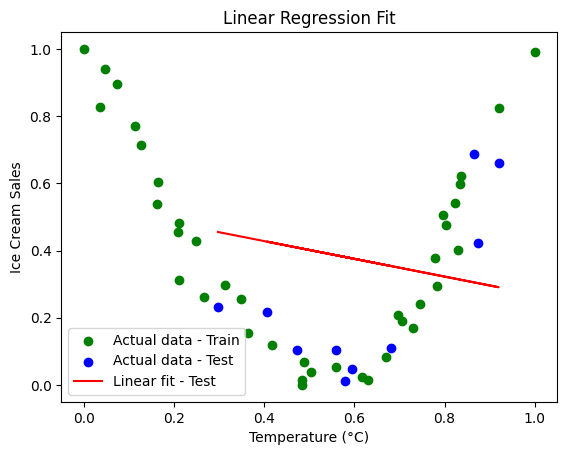

Linear Regression MSE: 0.08664421427841133
Linear Regression Coefficient: [[-0.26407378]], Intercept: [0.5337015]


In [47]:
# Linear Regression -------------------

# Fit Linear Regression 
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Predictions
y_pred_lin = lin_model.predict(X_test)

# Plot
plt.scatter(X_train, y_train, color='green', label='Actual data - Train')
plt.scatter(X_test, y_test, color='blue', label='Actual data - Test')
plt.plot(X_test, y_pred_lin, color='red', label='Linear fit - Test')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

# Evaluate Linear Regression
mse_lin = mean_squared_error(y_test, y_pred_lin)
print(f'Linear Regression MSE: {mse_lin}')

# Display coefficients
print(f'Linear Regression Coefficient: {lin_model.coef_}, Intercept: {lin_model.intercept_}')


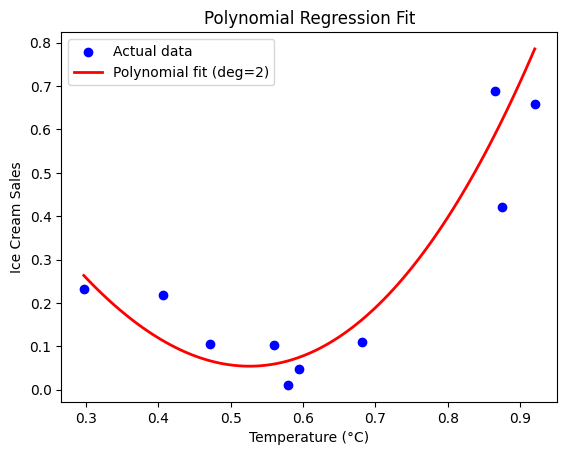

Mean Squared Error (MSE): 0.00877314589624749

Feature Coefficients:
  Feature  Coefficient
0      x0    -3.530291
1    x0^2     2.449860
2    x0^3     1.147824


In [ ]:
# Polynomial Regression -------------------

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)  # transforms X into [X, X^2]

# Fit Linear Regression on polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predictions for a smooth plotting range
X_range = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1,1)
X_range_poly = poly.transform(X_range)
y_poly_pred = poly_model.predict(X_range_poly)

# Plot
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_range.flatten(), y_poly_pred, color='red', linewidth=2, label='Polynomial fit (deg=2)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.show()

# Evaluate the model on the test set
y_test_poly_pred = poly_model.predict(poly.transform(X_test))
mse = mean_squared_error(y_test, y_test_poly_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Display coefficients
feature_names = poly.get_feature_names_out()
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': poly_model.coef_[0]
})
print("\nFeature Coefficients:")
print(coefficients)



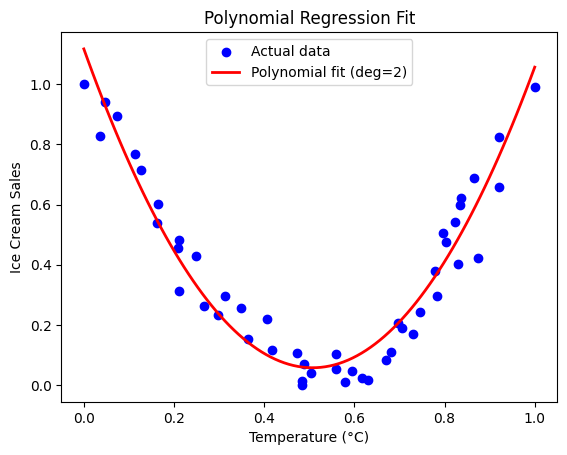

In [71]:
# Plot all data points and both fits

X_range = np.linspace(X_scaled.min(), X_scaled.max(), 100).reshape(-1,1)
X_range_poly = poly.transform(X_range)
y_poly_pred = poly_model.predict(X_range_poly)


plt.scatter(X_scaled, y_scaled, color='blue', label='Actual data')
plt.plot(X_range.flatten(), y_poly_pred, color='red', linewidth=2, label='Polynomial fit (deg=2)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.show()